# Let's try to predict if a specific gig will do good (in score)

In [ ]:
# import the gigs_data_cleaned.df (pickle) file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns   
import pickle

# import the gigs_data_cleaned.df (pickle) file
with open('gigs_data_cleaned.df', 'rb') as f:
    gigs_data_cleaned = pickle.load(f)

# Add the score column
gigs_data_cleaned['rating_counts'] = pd.to_numeric(gigs_data_cleaned['rating_counts'], errors='coerce')
gigs_data_cleaned['rating_score'] = pd.to_numeric(gigs_data_cleaned['rating_score'], errors='coerce')
gigs_data_cleaned['score'] = gigs_data_cleaned['rating_counts'] * gigs_data_cleaned['rating_score']

gigs_data_cleaned = gigs_data_cleaned.dropna(subset=['score'])
median = gigs_data_cleaned['score'].median()
gigs_data_cleaned['category'] = pd.Categorical(gigs_data_cleaned['category'])
gigs_data_cleaned['country'] = pd.Categorical(gigs_data_cleaned['country'])
gigs_data_cleaned['category'] = gigs_data_cleaned['category'].cat.codes
gigs_data_cleaned['country'] = gigs_data_cleaned['country'].cat.codes

gigs_data_cleaned['prices'] = gigs_data_cleaned['prices'].apply(lambda x: np.mean(x))
gigs_data_cleaned['delivery_times'] = gigs_data_cleaned['delivery_times'].apply(lambda x: np.mean(x))
gigs_data_cleaned['revisions'] = gigs_data_cleaned['revisions'].apply(lambda x: np.mean(x))

X_train, X_test, y_train, y_test = train_test_split(gigs_data_cleaned[['delivery_times', 'category', 'country', 'seller_level', 'orders_in_queue', 'prices']], gigs_data_cleaned['score'] >= median, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate prediction precision precentage in precentage
print('Prediction precision precentage: ', model.score(X_test, y_test)*100)

# calculate r squared
print('R squared: ', model.score(X_test, y_test))

gigs_data_cleaned.head()

In [104]:
# import the gigs_data_cleaned.df (pickle) file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns   
import pickle

# import the gigs_data_cleaned.df (pickle) file
with open('gigs_data_cleaned.df', 'rb') as f:
    gigs_data_cleaned = pickle.load(f)

# Add the score column
gigs_data_cleaned['rating_counts'] = pd.to_numeric(gigs_data_cleaned['rating_counts'], errors='coerce')
gigs_data_cleaned['rating_score'] = pd.to_numeric(gigs_data_cleaned['rating_score'], errors='coerce')
gigs_data_cleaned['score'] = gigs_data_cleaned['rating_counts'] * gigs_data_cleaned['rating_score']

# calculate the median of the score column
median = gigs_data_cleaned['score'].median()

gigs_data_cleaned = gigs_data_cleaned.dropna(subset=['score'])

gigs_data_cleaned['category'] = pd.Categorical(gigs_data_cleaned['category'])
gigs_data_cleaned['country'] = pd.Categorical(gigs_data_cleaned['country'])
gigs_data_cleaned['category'] = gigs_data_cleaned['category'].cat.codes
gigs_data_cleaned['country'] = gigs_data_cleaned['country'].cat.codes

X_train, X_test, y_train, y_test = train_test_split(gigs_data_cleaned[['category', 'country', 'seller_level', 'orders_in_queue']], gigs_data_cleaned['score'] >= median, test_size=0.2, random_state=42)

model = DecisionTreeRegressor(random_state=42, max_depth=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# calculate prediction precision precentage in precentage
print('Prediction precision precentage: ', model.score(X_test, y_test)*100)

# calculate r squared
print('R squared: ', model.score(X_test, y_test))

gigs_data_cleaned.head()

Prediction precision precentage:  19.252686662152342
R squared:  0.1925268666215234


,gig_title,rating_score,orders_in_queue,rating_counts,seller_level,category,delivery_times,prices,revisions,tags,language,country,member_since,features,score
0,I will design product advertisement poster and...,4.9,4,411.0,2,397,"[4, 4, 5]","[117.33, 156.44, 332.43]","[3, 6, inf]","['advertising poste', 'product poste', 'facebo...","English, Hindi",47,2019-06-01,"['1 Poster design + JPG, PNG, Print-Ready PDF ...",2013.9
1,I will make an animated lottie json for web or...,5.0,0,576.0,3,306,"[2, 2, 3]","[136.88, 273.77, 625.76]","[1, 2, 2]","['lotti', 'gi', 'websit', 'sv']","English, Ukrainian",114,2020-03-01,"['Basic animation of one element - icon, butto...",2880.0
2,I will create high converting google ads ppc a...,4.9,3,27.0,2,444,"[4, 7, 10]","[567.09, 1017.0, 1350.0]","[1, 1, 1]","['google adword', 'google ad']","English, Czech, German",39,2021-04-01,['Setup 1 Campaign + Keywords Research + High...,132.3
3,I will do editing and fact checking ai generat...,5.0,0,1.0,1,207,"[1, 1, 1]","[19.55, 39.11, 58.66]","[0, 0, 0]","['a', 'copywritin', 'article write']","English, Urdu",82,2021-11-01,"['i will write using chatgpt ', 'i will write ...",5.0
4,I will create a pixel collectibles for nft col...,5.0,2,241.0,2,344,"[2, 3, 5]","[39.11, 136.88, 254.21]","[1, 1, 1]","['nft ar', 'nft desig', 'nft pixel ar', 'nf']","English, Indonesian, Javanese",48,2019-09-01,['[CONTACT ME FIRST BEFORE ORDER]\r\nYou can g...,1205.0


10
Prediction precision precentage:  85.51549652118912


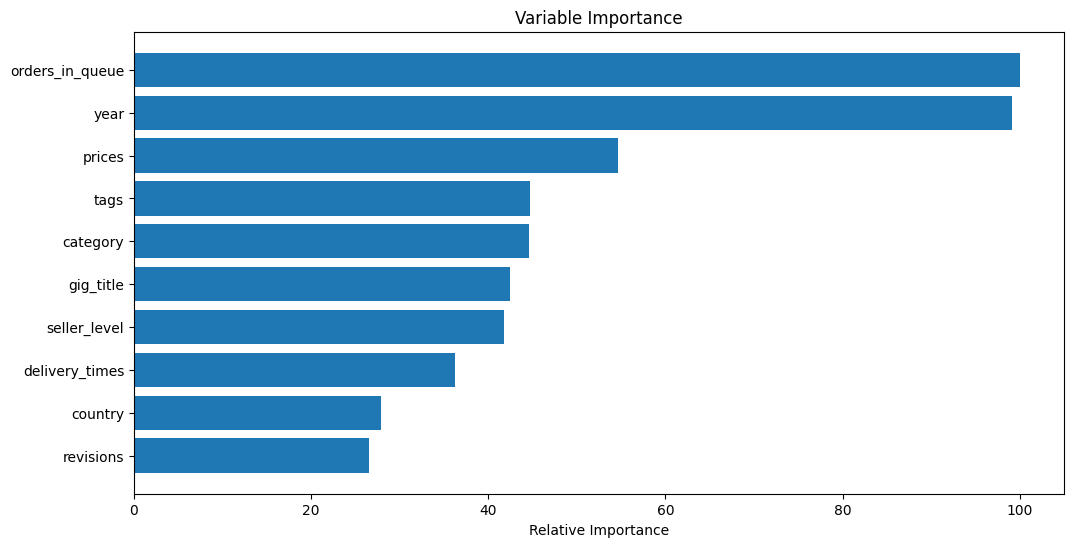

In [208]:
# import the gigs_data_cleaned.df (pickle) file

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error
import seaborn as sns   
import pickle

# import the gigs_data_cleaned.df (pickle) file
with open('gigs_data_cleaned.df', 'rb') as f:
    gigs_data_cleaned = pickle.load(f)

# Add the score column
gigs_data_cleaned['rating_counts'] = pd.to_numeric(gigs_data_cleaned['rating_counts'], errors='coerce')
gigs_data_cleaned['rating_score'] = pd.to_numeric(gigs_data_cleaned['rating_score'], errors='coerce')
gigs_data_cleaned['score'] = gigs_data_cleaned['rating_counts'] * gigs_data_cleaned['rating_score']

# calculate the median of the score column
median = gigs_data_cleaned['score'].median()
avg = gigs_data_cleaned['score'].mean()

# use random forest to predict the score column
gigs_data_cleaned = gigs_data_cleaned.dropna(subset=['score'])

gigs_data_cleaned['category'] = pd.Categorical(gigs_data_cleaned['category'])
gigs_data_cleaned['country'] = pd.Categorical(gigs_data_cleaned['country'])
gigs_data_cleaned['country'] = gigs_data_cleaned['country'].cat.codes
gigs_data_cleaned['category'] = gigs_data_cleaned['category'].cat.codes
gigs_data_cleaned['prices'] = gigs_data_cleaned['prices'].apply(lambda x: np.mean(x))
gigs_data_cleaned['delivery_times'] = gigs_data_cleaned['delivery_times'].apply(lambda x: np.mean(x))
gigs_data_cleaned['revisions'] = gigs_data_cleaned['revisions'].apply(lambda x: np.mean(x))
# if revisions is inf, replace it with -1
gigs_data_cleaned['revisions'] = gigs_data_cleaned['revisions'].replace([np.inf, -np.inf], -999)
# convert member_since from datetime to numeric
gigs_data_cleaned['member_since'] = pd.to_numeric(gigs_data_cleaned['member_since'], errors='coerce')
gigs_data_cleaned['member_since'] = gigs_data_cleaned['member_since'].fillna(0)
gigs_data_cleaned['member_since'] = gigs_data_cleaned['member_since'].astype(int)
gigs_data_cleaned['member_since'] = gigs_data_cleaned['member_since'].apply(lambda x: 2020 - x)
gigs_data_cleaned['month'] = gigs_data_cleaned['member_since'].apply(lambda x: x % 12)
gigs_data_cleaned['year'] = gigs_data_cleaned['member_since'].apply(lambda x: x // 12)
gigs_data_cleaned['gig_title'] = pd.Categorical(gigs_data_cleaned['gig_title'])
gigs_data_cleaned['gig_title'] = gigs_data_cleaned['gig_title'].cat.codes
gigs_data_cleaned['tags'] = gigs_data_cleaned['tags'].apply(lambda x: len(x))

                  

sfm = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold=0)
sfm.fit(gigs_data_cleaned[['tags', 'gig_title', 'category', 'country', 'seller_level', 'orders_in_queue', 'prices', 'delivery_times', 'revisions', 'year', 'month']], gigs_data_cleaned['score'] >= median)
X_transform = sfm.transform(gigs_data_cleaned[['tags', 'gig_title', 'category', 'country', 'seller_level', 'orders_in_queue', 'prices', 'delivery_times', 'revisions', 'year', 'month']])
n_features = X_transform.shape[1]
print(n_features)

X_train, X_test, y_train, y_test = train_test_split(X_transform, gigs_data_cleaned['score'] > avg , test_size=0.2, random_state=42)

model = RandomForestClassifier(n_estimators=500, random_state=42, max_depth=None, min_samples_leaf=2, min_samples_split=2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)


# calculate prediction precision precentage in precentage
print('Prediction precision precentage: ', model.score(X_test, y_test)*100)

# plot the feature importance
feature_importance = model.feature_importances_
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)

pos = np.arange(sorted_idx.shape[0]) + .5
plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')

plt.yticks(pos, gigs_data_cleaned[['tags', 'gig_title', 'category', 'country', 'seller_level', 'orders_in_queue', 'prices', 'delivery_times', 'revisions', 'year', 'month']].columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

